# HW1 Programming Problem 3 (10 points)

In this problem, you will implement a K-NN regressor from scratch. Start by running the following cell to load the dataset.

Dataset:
- `w1_data`: $w_1$ values
- `w2_data`: $w_2$ values
- `L_data`: $L$ values

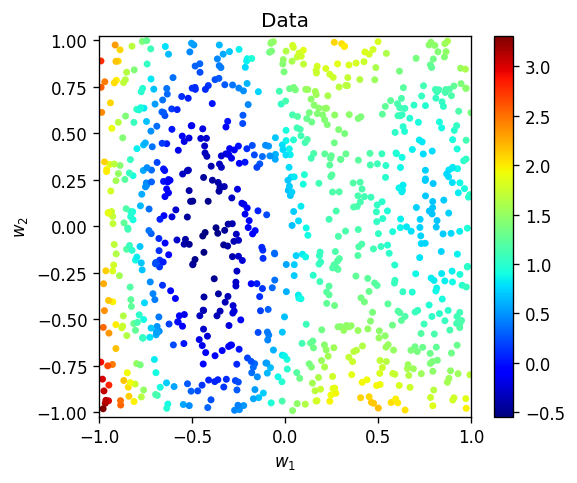

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 876
w1_data = np.random.uniform(-1,1,N)
w2_data = np.random.uniform(-1,1,N)
L_data = np.cos(4*w1_data + w2_data/4 - 1) + w2_data**2 + 2*w1_data**2

plt.figure(figsize=(5,4.2),dpi=120)
plt.scatter(w1_data,w2_data,s=10,c=L_data,cmap="jet")
plt.colorbar()
plt.axis("equal")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Data")
plt.show()


## K - Nearest Neighbors Regressor

### Distance function
Now we will implement an unweighted K-NN regressor. First, finish the function `distance(w1, w2)` which computes the euclidean distance between a point `[w1, w2]` and each pair from `w1_data, w2_data`.
The function should return an array of distances with the same length as `w1_data` or `w2_data`. Instead of using a for loop, you can do this by subtracting each individual scalar from the corresponding data array. For example, `w1 - w1_data` is an array that contains the difference between `w1` and each element in `w1_data`.
Complete the function to compute the array $\sqrt{(w_1 - w_{1,data (i)})^2 + (w_2 - w_{2,data (i)})^2}$.

In [3]:
def distance(w1, w2):
    # YOUR CODE GOES HERE
    w1_diff = w1 - w1_data
    w2_diff = w2 - w2_data
    L2 = ((w1_diff)**2+(w2_diff)**2)**0.5
    return L2



# Check that the function outputs the correct array size
assert(distance(0, 0).shape == w1_data.shape)

## Sorting a distance array

You can get the k-smallest elements of an array by using the `np.argpartition()` function. `np.argpartition(A, k)[:k]` returns an array of `k` indices corresponding to the k-smallest values in `A`.
If we apply this to an array of distances from a point $w$ to each data point, we can get the indices of the k-nearest neighbors of $w$. Complete the function below to do this.

In [21]:
import numpy as np
def get_knn_indices(w1, w2, k):
    d = distance(w1, w2)
    # YOUR CODE GOES HERE
    indices = np.argpartition(d,k)[:k]
    return indices
    

# Check the function on the point w=(0,0) with k=5
indices = get_knn_indices(0,0,5)
print("5 points nearest (0,0):", indices, "\n(Should be 255 733 538 815 501)")

[255 733 538 815 501]
5 points nearest (0,0): [255 733 538 815 501] 
(Should be 255 733 538 815 501)


## Unweighted regression

After acquiring the indices of the nearest points, you can determine the output values at these points by indexing into `L_data`, as in: `L_data[indices]`. Then, the function `np.mean()` can be used to compute the average value of these points. Complete the function below to do this. Return from this function a single value, the average of the k points closest to $w$.

In [22]:
def knn_regress(w1, w2, k):
    indices = get_knn_indices(w1, w2, k)
    # YOUR CODE GOES HERE
    L = [L_data[n] for n in indices]
    est_val = np.mean(L)
    return est_val


# Check the function on the point w=(0,0) with k=2
val = knn_regress(0,0,2)
print("Mean of 2 points nearest (0,0):", val, "\n(Should be about 0.72)")

[815 501]
Mean of 2 points nearest (0,0): 0.7190087852048137 
(Should be about 0.72)


## Plotting the K-NN function

Now we will evaluate the function on a meshgrid of points. `np.meshgrid` is used frequently for 2D visualization, so step through the next few cells to see how it works.

First, we choose arrays of values for `w1` and `w2` that we want to be the x- and y- coordinates of grid points:

In [23]:
w1_vals = np.linspace(-1,1,50)
w2_vals = np.linspace(-1,1,50)
print("w1 grid values:",w1_vals)
print("w2 grid values:",w2_vals)

w1 grid values: [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]
w2 grid values: [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18

Next, we get a 'cartesian product' of these arrays -- we get every combination of them; these will be our grid points. For this we use `np.meshgrid()`.

Note that we flatten these arrays to get 1-D arrays of the grid points' coordinates:

In [24]:
w1s, w2s = np.meshgrid(w1_vals, w2_vals)
print("Size of w1 grid point array:", w1s.shape)
print("Size of w2 grid point array:", w2s.shape)

w1_grid, w2_grid = w1s.flatten(), w2s.flatten()
print("Flattened size of w1 grid point array:", w1_grid.shape)
print("Flattened size of w2 grid point array:", w2_grid.shape)

Size of w1 grid point array: (50, 50)
Size of w2 grid point array: (50, 50)
Flattened size of w1 grid point array: (2500,)
Flattened size of w2 grid point array: (2500,)


Now, we can loop through these arrays to call our K-NN regression function on the whole meshgrid, and plot it. Here we set k = 4, but this will be changed later.

In [36]:

k = [1,4,20]
L_grid = np.zeros_like(w1_grid)

[407]
[407]
[6]
[6]
[6]
[283]
[283]
[867]
[867]
[867]
[867]
[173]
[637]
[637]
[22]
[22]
[22]
[607]
[607]
[639]
[60]
[526]
[626]
[626]
[578]
[550]
[550]
[326]
[326]
[357]
[559]
[559]
[559]
[137]
[137]
[2]
[388]
[388]
[388]
[820]
[292]
[292]
[292]
[197]
[197]
[197]
[412]
[69]
[69]
[69]
[407]
[171]
[6]
[6]
[283]
[283]
[546]
[318]
[867]
[49]
[49]
[173]
[637]
[637]
[22]
[143]
[143]
[607]
[870]
[60]
[526]
[397]
[626]
[626]
[578]
[550]
[700]
[326]
[463]
[357]
[559]
[559]
[559]
[137]
[137]
[2]
[325]
[388]
[25]
[820]
[820]
[292]
[292]
[197]
[197]
[197]
[412]
[412]
[69]
[69]
[371]
[371]
[98]
[424]
[672]
[546]
[546]
[589]
[318]
[49]
[49]
[173]
[537]
[224]
[143]
[143]
[143]
[819]
[443]
[60]
[526]
[397]
[426]
[626]
[578]
[578]
[700]
[326]
[463]
[357]
[81]
[81]
[101]
[137]
[137]
[137]
[196]
[325]
[25]
[774]
[774]
[314]
[314]
[473]
[473]
[745]
[412]
[540]
[154]
[154]
[840]
[840]
[515]
[311]
[311]
[259]
[644]
[589]
[730]
[721]
[728]
[158]
[537]
[224]
[617]
[84]
[819]
[819]
[443]
[443]
[835]
[835]
[426

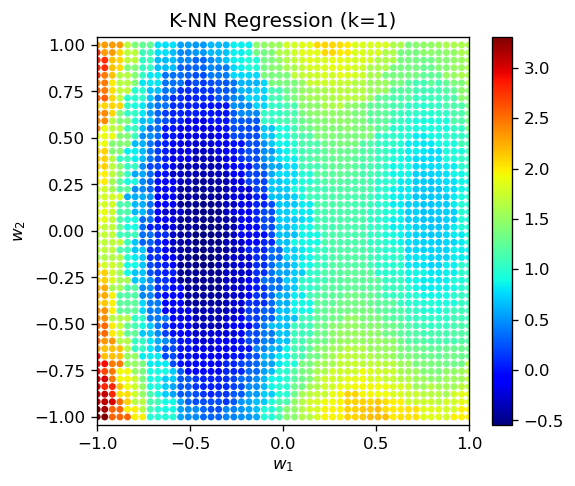

[171 407 371  98]
[171 407  98 371]
[  6 407 171  98]
[  6 424 283 672]
[424   6 672 283]
[672   6 283 546]
[546 283 589 318]
[318  49 867 589]
[ 49 867 318 589]
[173 867  49 318]
[637  49 173 867]
[ 49 173 637 867]
[173 637 537  22]
[637  22 143 173]
[143  22 637 224]
[ 22 143 607 637]
[ 22 607 143 870]
[ 60 607 870 639]
[607 639 870  60]
[639  60 870 607]
[ 60 639 526 870]
[397 526 626  60]
[397 626 526 426]
[578 550 626 397]
[578 550 626 700]
[700 326 578 550]
[700 550 578 326]
[326 550 700 463]
[700 326 463 357]
[463 357 559 326]
[357 559 463  81]
[559  81 357 101]
[101 559  81 137]
[137 559 101   2]
[  2 137 325 196]
[  2 325 388 137]
[388 325   2 196]
[325 388   2  25]
[388  25 820 774]
[820 292  25 774]
[820 292 774  25]
[820 292  25 774]
[292 197 473 820]
[197 473 292 745]
[473 197 745 412]
[412 197 473 540]
[412 540 197  69]
[412  69 540 154]
[540  69 154 412]
[ 69 154 412 540]
[407 171 371  98]
[171  98 371 407]
[  6  98 424 171]
[424   6 672 283]
[424 672 283   6]
[672 283 5

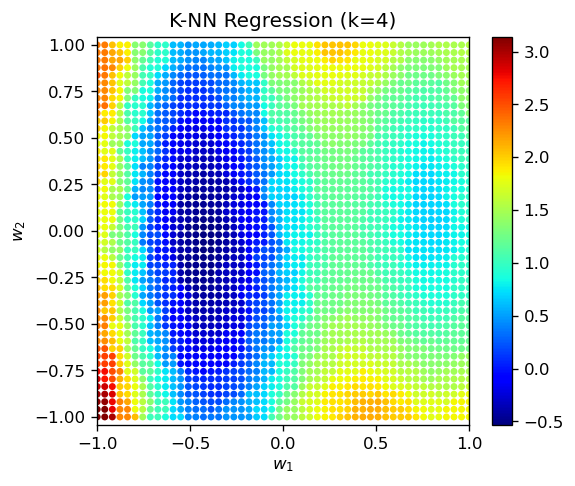

[171 205 840  98 371 672   6 311 722 407 283 515 424 434 586 259 546 285
 377 644]
[424 546 259 672 283  98   6 311 205 840 434 371 722 515 407 171 644 377
 285 586]
[424 546 722 311 434 205   6 515 840 672  98 371 171 259 283 407 644 586
 589 318]
[546 672 371 171 283 407   6  98 424 311 840 515 434 644 722 259 589 205
 318 586]
[644 424 546 371 311  98   6 171 283 672 407 434 259 515  49 840 867 722
 318 589]
[311 424 434 546 867 589   6 672 318 259 644 283  98 171 371 407  49 730
 722 515]
[644  49 259 546 589 424   6 434 730 318 721 311 672 283 867  98 173 171
 722 728]
[589 283 644 730  49 672 318 867 546 173   6 728 311 424 637 665 434 259
 721 722]
[ 49 867 318 589 644 546 173 730 283 728 672 721 637 259   6 537 158 665
 311 424]
[867 730 728 173 224 721 158  49 537 259 546 672 665 283 644 637 318 589
  22 617]
[318 173 728 867 637  49 589 537 158 224  22 730 721 546 143 644 665 617
 283 250]
[224  22 143 158  49 637 318 173 589 867 537 728 617  84 250 721 730 546
 644 665]
[617

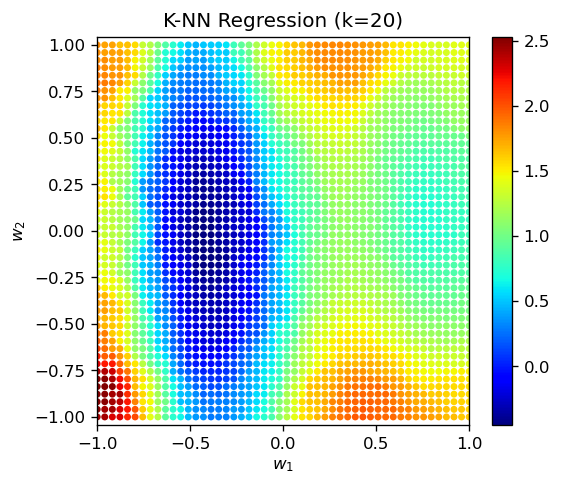

In [40]:
def plot(n):
    plt.figure(figsize=(5,4.2),dpi=120)
    plt.scatter(w1_grid,w2_grid,s=10,c=L_grid,cmap="jet")
    plt.colorbar()
    plt.axis("equal")
    plt.xlabel("$w_1$")
    plt.ylabel("$w_2$")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.title("K-NN Regression (k=%d)"%n)
    plt.show()

for n in k:
    for i in range(len(L_grid)):
        L_grid[i] = knn_regress(w1_grid[i], w2_grid[i],n)
    plot(n)



## Question

Go back a couple cells and experiment with changing the `k` value. Is the regression function "smoother" with lower or higher `k`? Why do you think that is?


**ANS:**

Regression is smoother as k value increases. From the above result, we can see the colorbar scale differences between k=1 and k=20. 

The values of data points at the lower left corner are averaged down by a larger batch of neighbors when k=20. 

When k=1, data points are given values that are essentially duplicates of the nearest known data point. 

Therefore, it is clear that higher k values produce smoother regression results. 